# DataAnalysis

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu

data_path = 'Data.csv'
data = pd.read_csv(data_path, delimiter=';')

figures = {} #Storing figures for print

## Time Metric

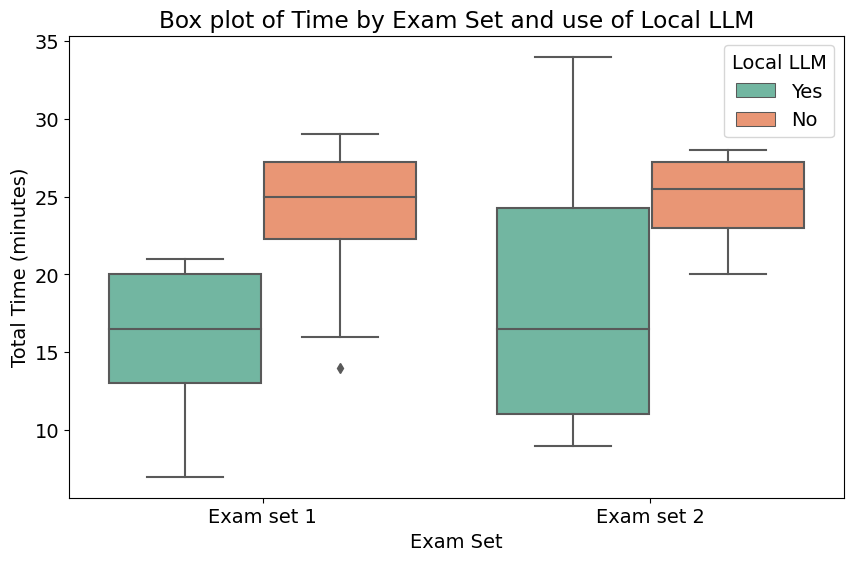

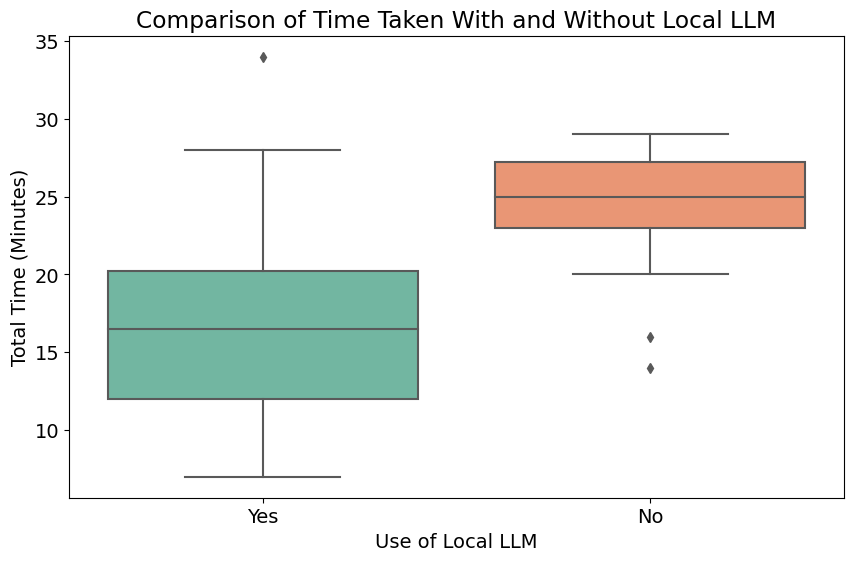

In [73]:
plt.rcParams.update({'font.size': 14})  

def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')
            if len(parts) == 2:
                time_str = parts[0]
            else:
                time_str = task
            total_time += int(time_str)
    return total_time

task_columns = data.iloc[:, 3:11]

data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)

data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)

data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered,
            palette='Set2', order=['Exam set 1', 'Exam set 2'])
plt.title('Box plot of Time by Exam Set and use of Local LLM')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.legend(title='Local LLM')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total_Time_Minutes', data=data, palette='Set2')
plt.title('Comparison of Time Taken With and Without Local LLM')
plt.xlabel('Use of Local LLM')
plt.ylabel('Total Time (Minutes)')
figures['box_plot_time_with_without_llm'] = plt.gcf()
plt.show()


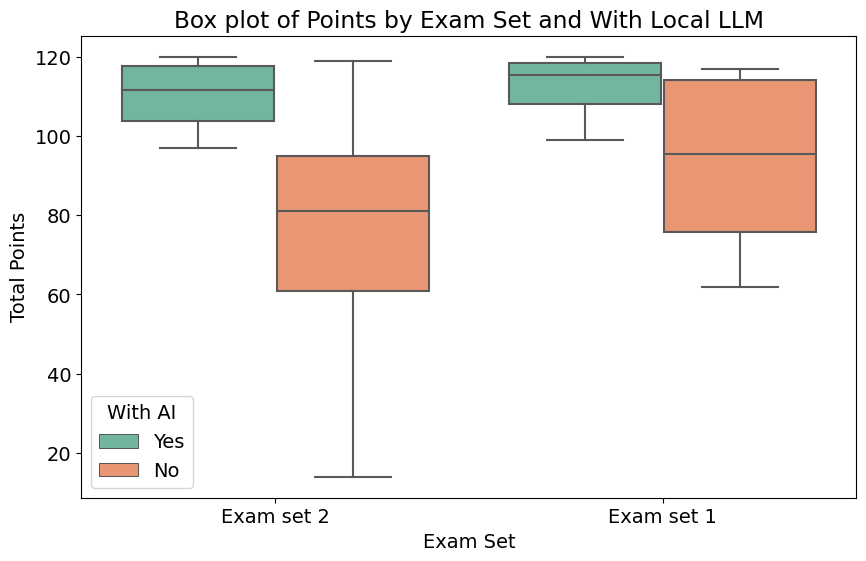

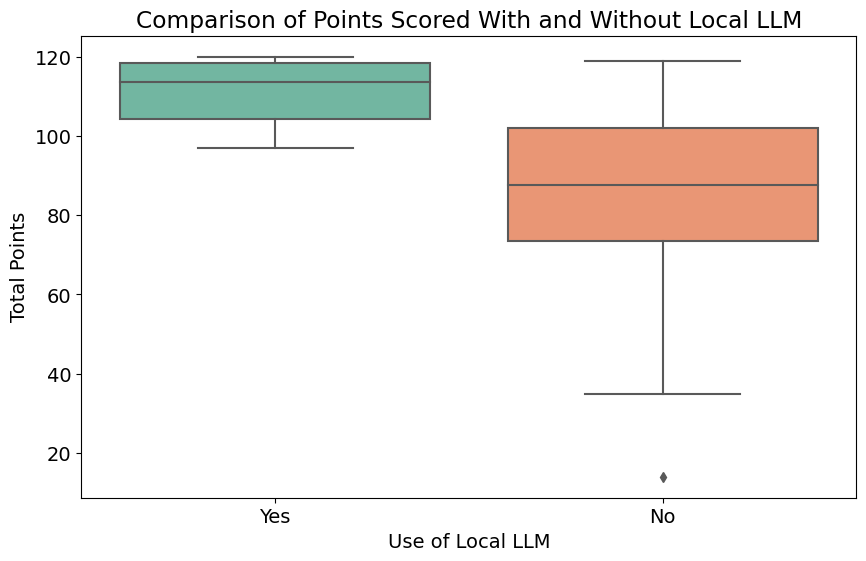

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total Points', hue='With AI', data=data_filtered,
            palette='Set2')
plt.title('Box plot of Points by Exam Set and With Local LLM')
plt.xlabel('Exam Set')
plt.ylabel('Total Points')
plt.legend(title='With AI')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total Points', data=data,
            palette='Set2')
plt.title('Comparison of Points Scored With and Without Local LLM')
plt.xlabel('Use of Local LLM')
plt.ylabel('Total Points')
figures['Comparison of Points Scored With and Without Local LLM'] = plt.gcf()
plt.show()


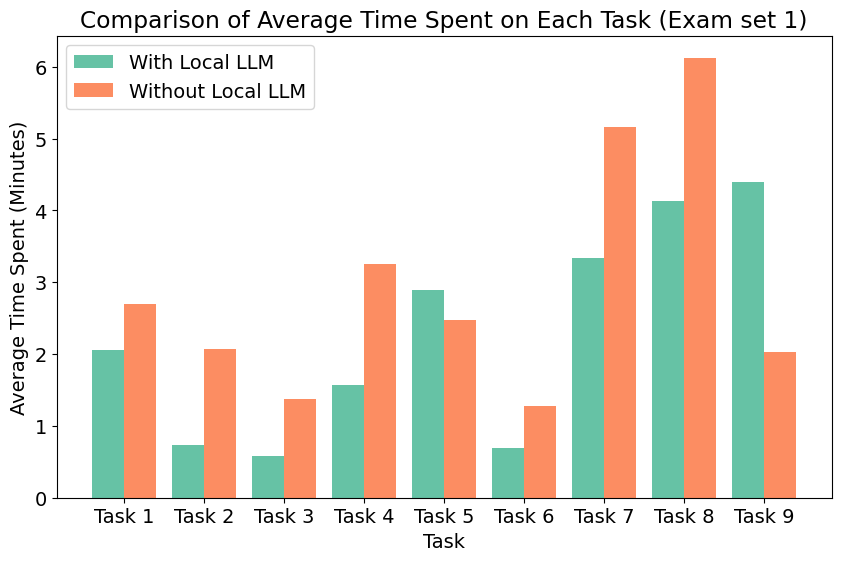

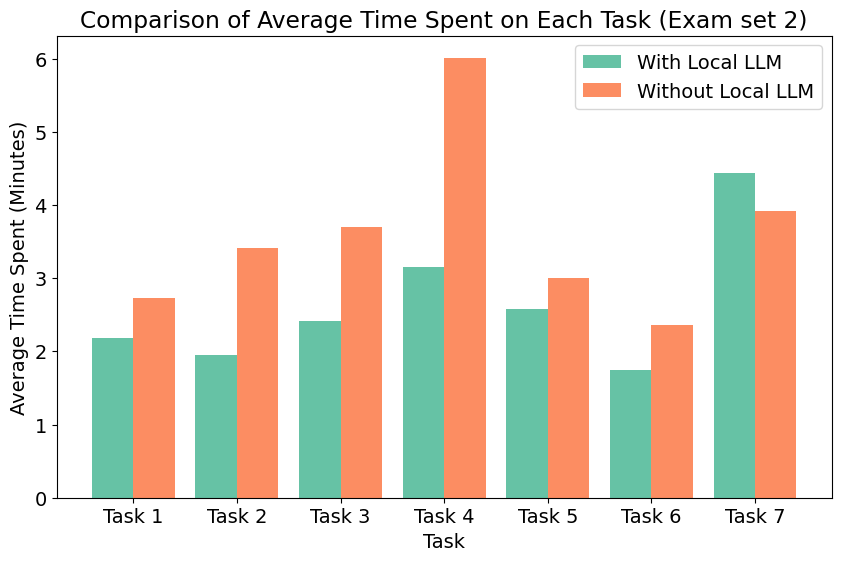

In [75]:
sns.set_palette("Set2")

def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan
    return total_time / count / 60 

avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 1')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 1')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 2')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 2')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7

task_names_robots = [f'Task {i}' for i in range(1, 10)]
task_names_ads = [f'Task {i}' for i in range(1, 8)]  # Only tasks 1-7

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With Local LLM')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without Local LLM')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Exam set 1)')
plt.xticks(range(1, 10), task_names_robots)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 8)], avg_time_with_ai_ads, width=0.4, label='With Local LLM')
plt.bar([i + 0.2 for i in range(1, 8)], avg_time_without_ai_ads, width=0.4, label='Without Local LLM')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Exam set 2)')
plt.xticks(range(1, 8), task_names_ads)
plt.legend()
plt.show()


## Split data for each exam set

In [76]:
Exam_set1_with_ai = data.loc[(data['Exam Set'] == 'Exam Set 1') & (data['With AI'] == 'Yes')]

Exam_set1_without_ai = data.loc[(data['Exam Set'] == 'Exam Set 1') & (data['With AI'] == 'No')]

Exam_set2_with_ai = data.loc[(data['Exam Set'] == 'Exam Set 2') & (data['With AI'] == 'Yes')]

Exam_set2_without_ai = data.loc[(data['Exam Set'] == 'Exam Set 2') & (data['With AI'] == 'No')]

## Code correctness metric

AI Group - Mean: 95.5, Median: 96.0, Variance: 75.82608695652173, Standard Deviation: 8.707817577126988, 95% CI: (92.01621140986659, 98.98378859013341)
No AI Group - Mean: 66.29166666666667, Median: 69.0, Variance: 768.6503623188407, Standard Deviation: 27.724544402367385, 95% CI: (55.199742588086934, 77.38359074524641)
T-statistic: 4.924006594223136, P-value: 1.1338743196120602e-05


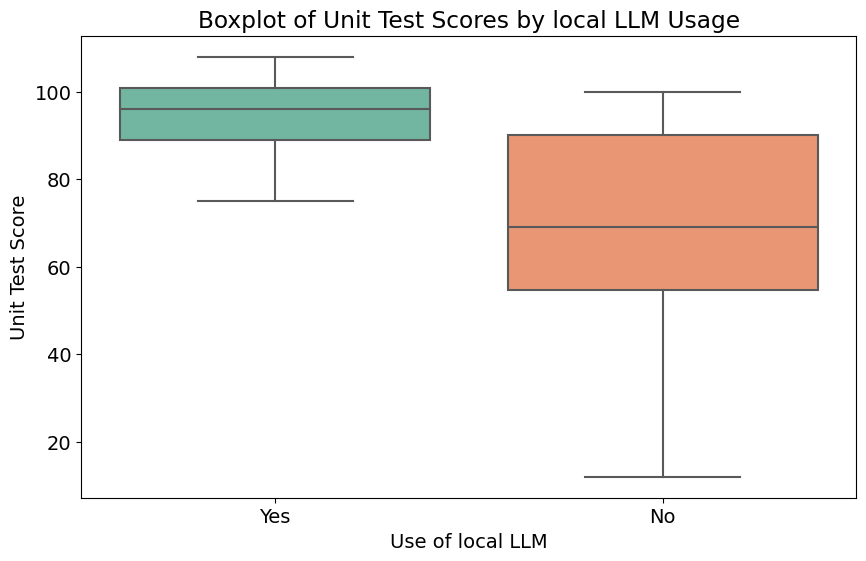

In [77]:
data_ai = data[data['With AI'] == 'Yes']['Unit Test'].dropna()
data_no_ai = data[data['With AI'] == 'No']['Unit Test'].dropna()

t_stat, p_value = stats.ttest_ind(data_ai, data_no_ai)

mean_ai = np.mean(data_ai)
median_ai = np.median(data_ai)
variance_ai = np.var(data_ai, ddof=1)
std_dev_ai = np.std(data_ai, ddof=1)
confidence_interval_ai = stats.norm.interval(0.95, loc=mean_ai, scale=std_dev_ai/np.sqrt(len(data_ai)))

mean_no_ai = np.mean(data_no_ai)
median_no_ai = np.median(data_no_ai)
variance_no_ai = np.var(data_no_ai, ddof=1)
std_dev_no_ai = np.std(data_no_ai, ddof=1)
confidence_interval_no_ai = stats.norm.interval(0.95, loc=mean_no_ai, scale=std_dev_no_ai/np.sqrt(len(data_no_ai)))

print(f"AI Group - Mean: {mean_ai}, Median: {median_ai}, Variance: {variance_ai}, Standard Deviation: {std_dev_ai}, 95% CI: {confidence_interval_ai}")
print(f"No AI Group - Mean: {mean_no_ai}, Median: {median_no_ai}, Variance: {variance_no_ai}, Standard Deviation: {std_dev_no_ai}, 95% CI: {confidence_interval_no_ai}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

sns.set_palette("Set2")
colors = sns.color_palette("Set2")[0:2]

plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Unit Test', data=data, palette={'Yes': colors[0], 'No': colors[1]})
plt.title('Boxplot of Unit Test Scores by local LLM Usage')
plt.xlabel('Use of local LLM')
plt.ylabel('Unit Test Score')
figures['Boxplot of Unit Test Scores by local LLM Usage'] = plt.gcf()
plt.show()

## Prompt metric

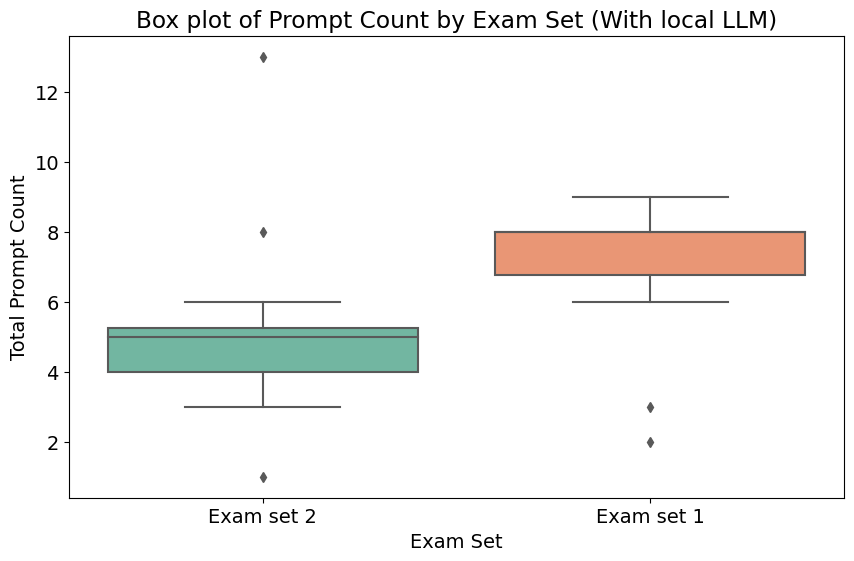

In [78]:
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')
            if len(parts) == 2:
                prompt_str = parts[1]
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

# Calculate total prompt count for each row
data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Filter data for rows with 'With AI' == 'Yes'
data_with_ai = data[data['With AI'] == 'Yes']

# Define a custom palette for the box plot
custom_palette = {'Exam set 2': sns.color_palette("Set2")[0], 'Exam set 1': sns.color_palette("Set2")[1]}

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', data=data_with_ai, palette=custom_palette)
plt.title('Box plot of Prompt Count by Exam Set (With local LLM)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.xticks([0, 1], ['Exam set 2', 'Exam set 1'])
figures['box_plot_prompt_count'] = plt.gcf()
plt.show()

## Points per task

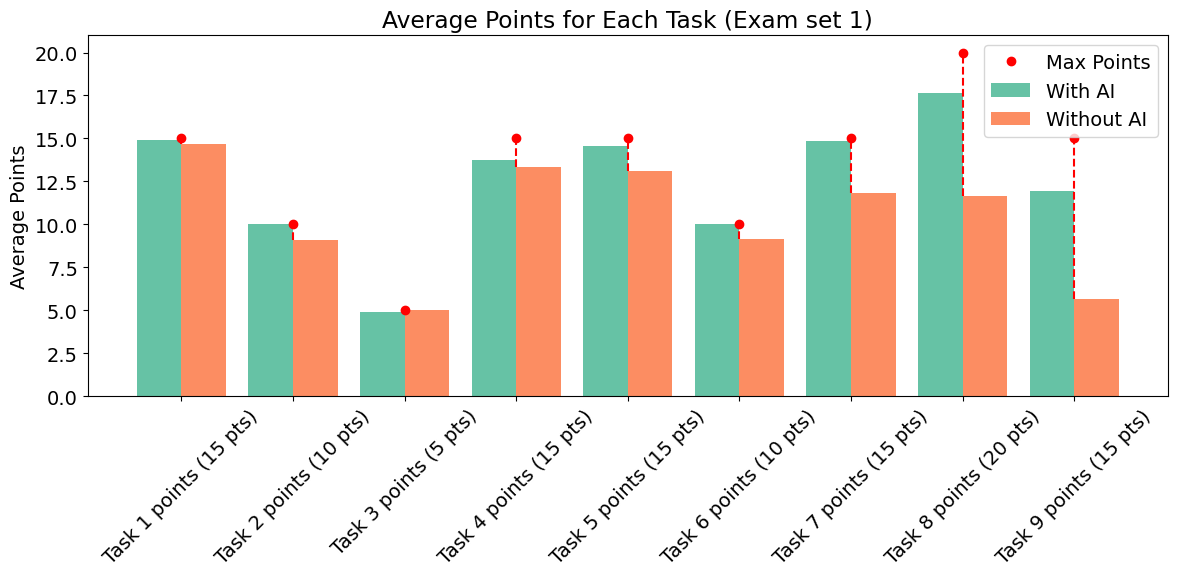

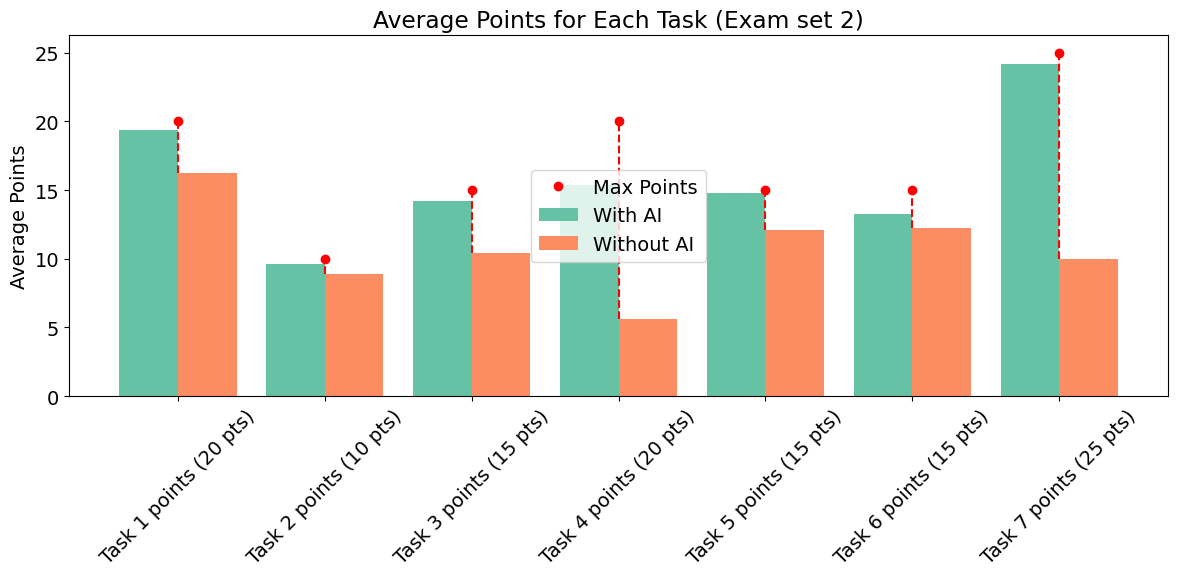

In [79]:
colors = sns.color_palette("Set2")[0:2]

data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 1')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 1')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 2')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 2')]

task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

avg_points_with_ai_robots = data_with_ai_robots[task_columns_robots].mean()
avg_points_without_ai_robots = data_without_ai_robots[task_columns_robots].mean()
avg_points_with_ai_ads = data_with_ai_ads[task_columns_adv].mean()
avg_points_without_ai_ads = data_without_ai_ads[task_columns_adv].mean()

max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

def plot_task_points(task_columns, avg_with_ai, avg_without_ai, max_points, title, key):
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, task in enumerate(task_columns):
        ax.bar(i - 0.2, avg_with_ai[i], width=0.4, label='With AI' if i == 0 else "", color=colors[0])
        ax.bar(i + 0.2, avg_without_ai[i], width=0.4, label='Without AI' if i == 0 else "", color=colors[1])
        ax.plot([i], [max_points[i]], 'ro', label='Max Points' if i == 0 else "")
        ax.vlines(i, ymin=min(avg_with_ai[i], avg_without_ai[i]), ymax=max_points[i], color='r', linestyle='--')
    ax.set_ylabel('Average Points')
    ax.set_title(title)
    ax.legend()
    ax.set_xticks(range(len(task_columns)))
    ax.set_xticklabels([f"{tc} ({mp} pts)" for tc, mp in zip(task_columns, max_points)], rotation=45)
    plt.tight_layout()
    figures[key] = plt.gcf()
    plt.show()

# Plot for Exam set 1 and save the figure
plot_task_points(task_columns_robots, avg_points_with_ai_robots, avg_points_without_ai_robots, max_points_per_task_robots, 'Average Points for Each Task (Exam set 1)', 'Average_Points_for_Each_Task_exam_set1_plot')

# Plot for Exam set 2 and save the figure
plot_task_points(task_columns_adv, avg_points_with_ai_ads, avg_points_without_ai_ads, max_points_per_task_advertisement, 'Average Points for Each Task (Exam set 2)', 'Average_Points_for_Each_Task_exam_set2_plot')


In [80]:
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 1')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 1')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 2')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 2')]

task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

def generate_comparison_results(with_ai_data, without_ai_data, tasks, max_points):
    results = []
    for i, task in enumerate(tasks):
        with_ai_points = with_ai_data[task].mean()
        without_ai_points = without_ai_data[task].mean()
        difference = with_ai_points - without_ai_points
        results.append({
            'Task': task.replace(' points', ''),
            'Without AI': round(without_ai_points, 2),
            'With AI': round(with_ai_points, 2),
            'Difference': round(difference, 2),
            'Max Points': max_points[i]
        })
    return results

comparison_results_robots = generate_comparison_results(data_with_ai_robots, data_without_ai_robots, task_columns_robots, max_points_per_task_robots)
comparison_results_advertisements = generate_comparison_results(data_with_ai_ads, data_without_ai_ads, task_columns_adv, max_points_per_task_advertisement)

print("Exam set 1 Tasks Points Comparison:")
for result in comparison_results_robots:
    print(result)

print("\nExam set 2 Tasks Points Comparison:")
for result in comparison_results_advertisements:
    print(result)


Exam set 1 Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 14.67, 'With AI': 14.92, 'Difference': 0.25, 'Max Points': 15}
{'Task': 'Task 2', 'Without AI': 9.08, 'With AI': 10.0, 'Difference': 0.92, 'Max Points': 10}
{'Task': 'Task 3', 'Without AI': 5.0, 'With AI': 4.92, 'Difference': -0.08, 'Max Points': 5}
{'Task': 'Task 4', 'Without AI': 13.33, 'With AI': 13.75, 'Difference': 0.42, 'Max Points': 15}
{'Task': 'Task 5', 'Without AI': 13.08, 'With AI': 14.58, 'Difference': 1.5, 'Max Points': 15}
{'Task': 'Task 6', 'Without AI': 9.17, 'With AI': 10.0, 'Difference': 0.83, 'Max Points': 10}
{'Task': 'Task 7', 'Without AI': 11.83, 'With AI': 14.83, 'Difference': 3.0, 'Max Points': 15}
{'Task': 'Task 8', 'Without AI': 11.67, 'With AI': 17.67, 'Difference': 6.0, 'Max Points': 20}
{'Task': 'Task 9', 'Without AI': 5.67, 'With AI': 11.92, 'Difference': 6.25, 'Max Points': 15}

Exam set 2 Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 16.25, 'With AI': 19.33, 'Difference': 3.

## Grade Metric

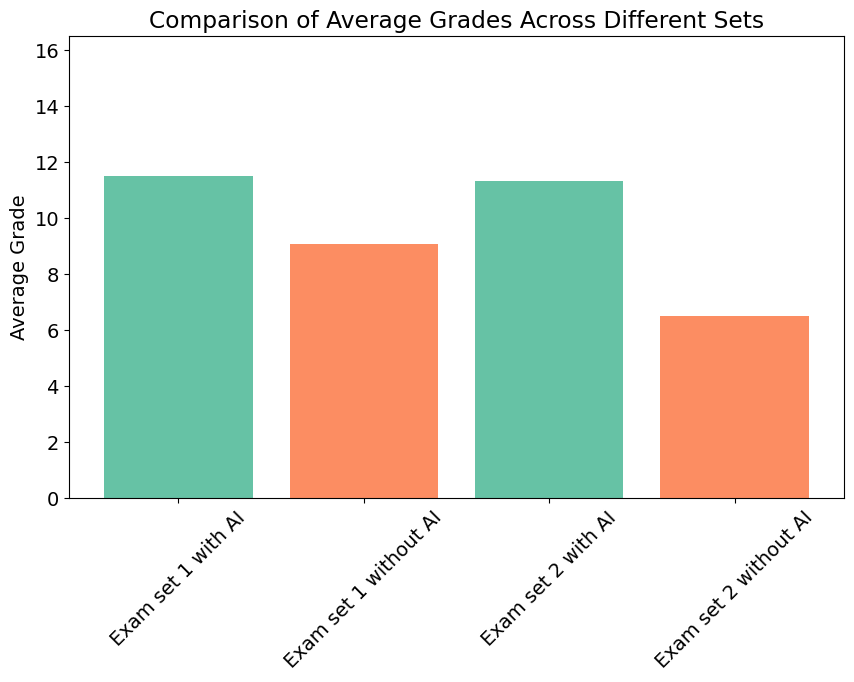

In [81]:
sns.set_palette("Set2")
colors = sns.color_palette("Set2")[0:2]

avg_grade_with_ai_robots = data_with_ai_robots['Grade'].mean()
avg_grade_without_ai_robots = data_without_ai_robots['Grade'].mean()
avg_grade_with_ai_ads = data_with_ai_ads['Grade'].mean()
avg_grade_without_ai_ads = data_without_ai_ads['Grade'].mean()

categories = ['Exam set 1 with AI', 'Exam set 1 without AI', 'Exam set 2 with AI', 'Exam set 2 without AI']
average_grades = [avg_grade_with_ai_robots, avg_grade_without_ai_robots, avg_grade_with_ai_ads, avg_grade_without_ai_ads]

category_colors = [colors[0] if 'with AI' in cat else colors[1] for cat in categories] 

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, average_grades, color=category_colors)
ax.set_ylabel('Average Grade')
ax.set_title('Comparison of Average Grades Across Different Sets')
ax.set_ylim(0, max(average_grades) + 5)

plt.xticks(rotation=45)
plt.show()


## Plots for discussion

### Background information

### Filtering for backgroundinformation

In [82]:
filtered_data = data.iloc[::2]

column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

filtered_data.rename(columns=rename_dict, inplace=True)

for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\2942021160.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\2942021160.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=rename_dict, inplace=True)
C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\2942021160.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Difference between Operating system and 'Total Time Minutes

In [83]:
total_points_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total Points'].sum()
total_time_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total_Time_Minutes'].sum()
total_points_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total Points'].sum()
total_time_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total_Time_Minutes'].sum()

print("Total time spent on tasks for Windows users:", total_time_windows)
print("Total time spent on tasks for MacOS users:", total_time_macos)
print("Total points on tasks for Windows users:", total_points_windows)
print("Total points on tasks for MacOS users:", total_points_macos) 

Total time spent on tasks for Windows users: 174.0
Total time spent on tasks for MacOS users: 314.0
Total points on tasks for Windows users: 779.0
Total points on tasks for MacOS users: 1379.0


### Descriptive statistics

In [84]:
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')
            if len(parts) == 2:
                time_str = parts[0]
            else:
                time_str = task 
            total_time += int(time_str)
    return total_time

data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

### Descriptive statistics on Time per task

In [85]:
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

if 'Total_Time_Minutes' in data.columns:
    grouped_time = data.groupby('With AI')['Total_Time_Minutes']
    time_stats = grouped_time.agg(['mean', 'median', 'var', 'std'])
    time_stats['95% CI'] = grouped_time.apply(lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x))))
    t_test_time = ttest_ind(grouped_time.get_group('Yes'), grouped_time.get_group('No'), equal_var=False)

    print(time_stats)
    print('T-test for Time:', t_test_time)
else:
    print("Column 'Total_Time_Minutes' does not exist. Please check your data preprocessing steps.")


              mean     median        var       std  \
With AI                                              
No       24.372222  25.216667  15.623180  3.952617   
Yes      17.062500  16.816667  43.419909  6.589379   

                                           95% CI  
With AI                                            
No        (22.790875170138737, 25.95356927430571)  
Yes      (14.426247972686788, 19.698752027313212)  
T-test for Time: TtestResult(statistic=-4.660386722085493, pvalue=3.8778672185273446e-05, df=37.65428357048778)


### Descriptive statistics on Points per task

In [86]:
if 'Total Points' not in data.columns:
    print("Total Points column missing. Check data processing steps.")
else:
    grouped_points = data.groupby('With AI')['Total Points']

    points_stats = grouped_points.agg(['mean', 'median', 'var', 'std'])
    points_stats['95% CI'] = grouped_points.apply(
        lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))
    )

    t_test_points = ttest_ind(
        grouped_points.get_group('Yes'), 
        grouped_points.get_group('No'), 
        equal_var=False
    )

    print(points_stats)
    print('T-test for Points:', t_test_points)


               mean  median         var        std  \
With AI                                              
No        84.500000    87.5  694.956522  26.362028   
Yes      111.583333   113.5   67.384058   8.208779   

                                           95% CI  
With AI                                            
No           (73.9531859857394, 95.0468140142606)  
Yes      (108.29919795836452, 114.86746870830214)  
T-test for Points: TtestResult(statistic=4.805440638113601, pvalue=4.9564516579501216e-05, df=27.418688581712328)


### Descriptive statistics on Unit test

In [87]:
unit_test_stats = data.groupby('With AI')['Unit Test'].agg([
    'mean', 'median', 'min', 'max', 'var', 'std', 'skew'
])
unit_test_stats['range'] = data.groupby('With AI')['Unit Test'].max() - data.groupby('With AI')['Unit Test'].min()
unit_test_stats['IQR'] = data.groupby('With AI')['Unit Test'].quantile(0.75) - data.groupby('With AI')['Unit Test'].quantile(0.25)

print(unit_test_stats)

              mean  median   min    max         var        std     skew  \
With AI                                                                   
No       66.291667    69.0  12.0  100.0  768.650362  27.724544 -0.76409   
Yes      95.500000    96.0  75.0  108.0   75.826087   8.707818 -0.53294   

         range    IQR  
With AI                
No        88.0  35.25  
Yes       33.0  11.75  


Plots to see distribution

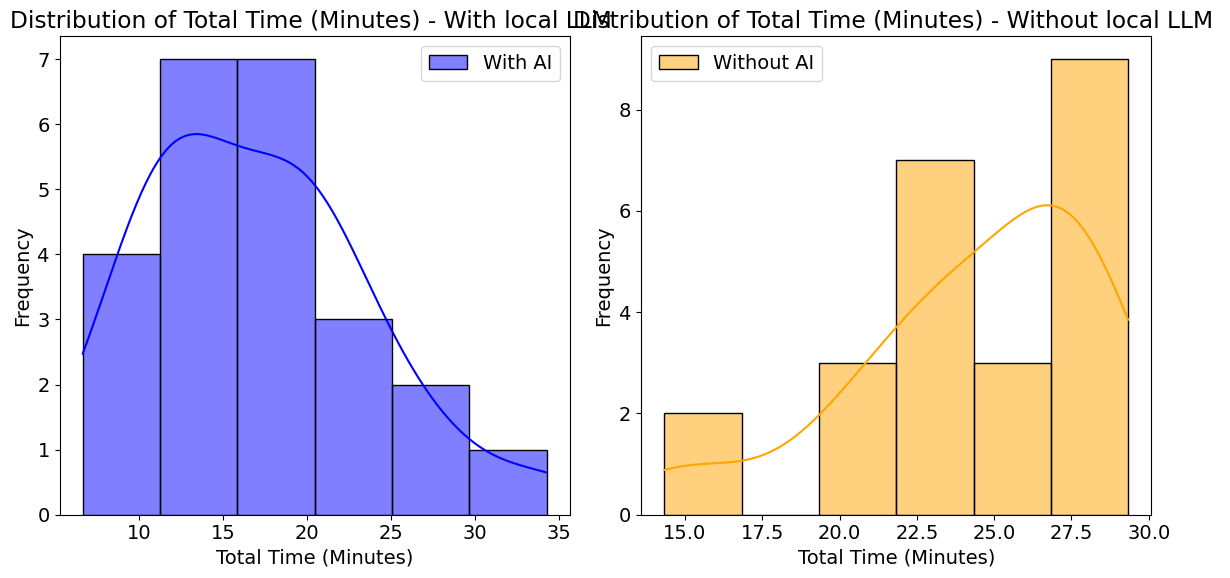

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total_Time_Minutes'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Total Time (Minutes) - With local LLM ')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total_Time_Minutes'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Total Time (Minutes) - Without local LLM ')
plt.xlabel('Total Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
figures['Distribution of Total Time - With- and without local LLM Usage'] = plt.gcf()
plt.show()

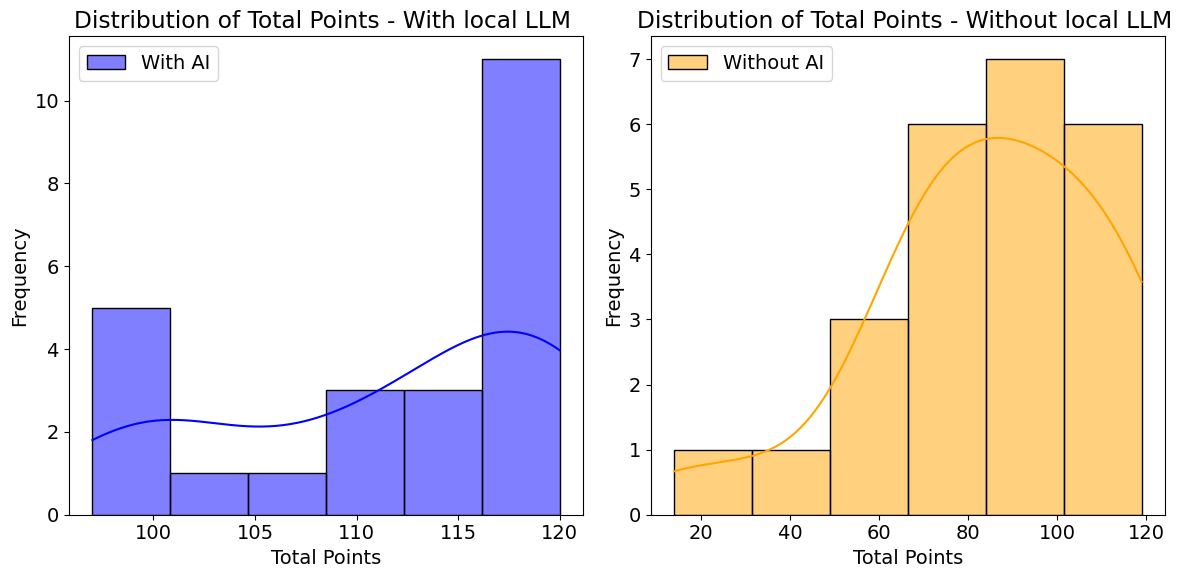

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total Points'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Total Points - With local LLM ')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total Points'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Total Points - Without local LLM ')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
figures['Distribution of Points - With- and without local LLM Usage'] = plt.gcf()
plt.show()

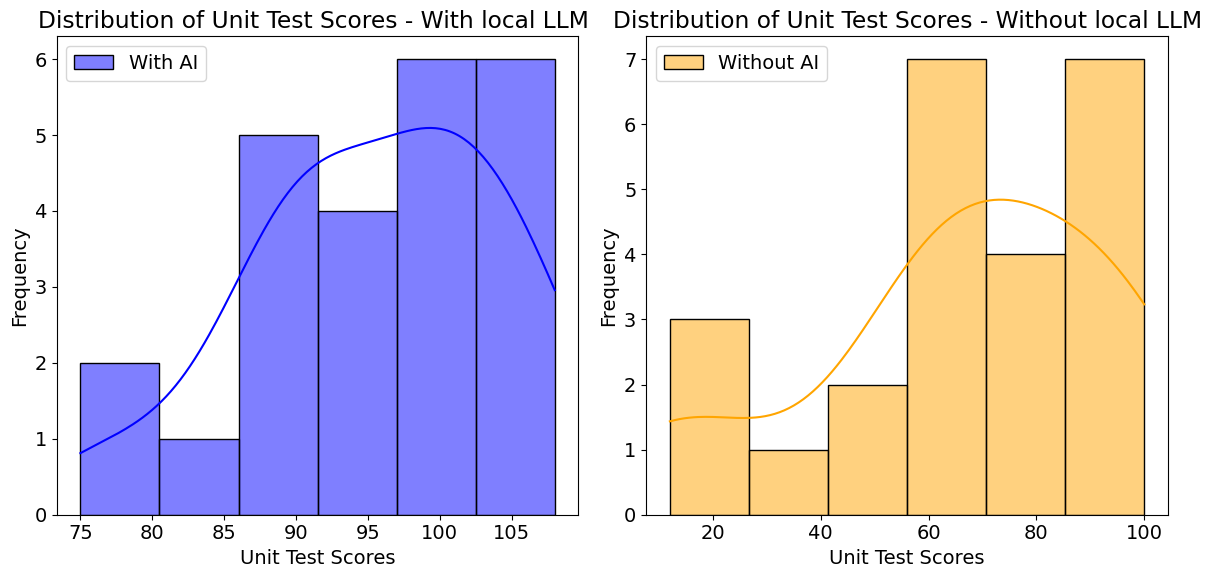

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Unit Test'], color='blue', kde=True, label='With AI')
plt.title('Distribution of Unit Test Scores - With local LLM ')
plt.xlabel('Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Unit Test'], color='orange', kde=True, label='Without AI')
plt.title('Distribution of Unit Test Scores - Without local LLM')
plt.xlabel('Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
figures['Distribution of Unit Test Scores- With- and without local LLM Usage'] = plt.gcf()
plt.show()

Not normally distributed, so we opt for Mann-Whitney U Test instead of T-test

In [91]:
time_with_ai = data[data['With AI'] == 'Yes']['Total_Time_Minutes']
time_without_ai = data[data['With AI'] == 'No']['Total_Time_Minutes']
points_with_ai = data[data['With AI'] == 'Yes']['Total Points']
points_without_ai = data[data['With AI'] == 'No']['Total Points']
scores_with_ai = data[data['With AI'] == 'Yes']['Unit Test']
scores_without_ai = data[data['With AI'] == 'No']['Unit Test']

u_stat_time, p_val_time = stats.mannwhitneyu(time_with_ai, time_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Time:", u_stat_time, "P-value:", p_val_time)

Mann-Whitney U test for Time: 94.0 P-value: 6.607022058463276e-05


In [92]:
u_stat_points, p_val_points = stats.mannwhitneyu(points_with_ai, points_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Points:", u_stat_points, "P-value:", p_val_points)

Mann-Whitney U test for Points: 494.0 P-value: 2.1943369188347926e-05


In [93]:
u_stat_scores, p_val_scores = stats.mannwhitneyu(scores_with_ai, scores_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Unit Test Scores:", u_stat_scores, "P-value:", p_val_scores)

Mann-Whitney U test for Unit Test Scores: 491.5 P-value: 2.6928567991721185e-05


In [94]:
if 'With AI' not in data.columns:
    print("Column 'With AI' not found. Please check the data file and column names.")
else:
    data['With AI'] = data['With AI'].astype(str)  # Convert to string if it's categorical
    print("Column 'With AI' found and converted to string type.")


Column 'With AI' found and converted to string type.


In [95]:
filtered_data['LLM Exp (Years)'] = pd.to_numeric(filtered_data['LLM Exp (Years)'], errors='coerce')
filtered_data['Grade'] = pd.to_numeric(filtered_data['Grade'], errors='coerce')

filtered_data_clean = filtered_data.dropna(subset=['LLM Exp (Years)', 'Grade'])

spearman_correlation_grade = filtered_data_clean['LLM Exp (Years)'].corr(filtered_data_clean['Grade'], method='spearman')
print(f"The Spearman correlation coefficient between LLM experience and grades is: {spearman_correlation_grade}")


The Spearman correlation coefficient between LLM experience and grades is: 0.018994167467944342


C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\2794939041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['LLM Exp (Years)'] = pd.to_numeric(filtered_data['LLM Exp (Years)'], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\2794939041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Grade'] = pd.to_numeric(filtered_data['Grade'], errors='coerce')


In [96]:
filtered_data['Total_Time_Minutes'] = pd.to_numeric(filtered_data['Total_Time_Minutes'], errors='coerce')

filtered_data_clean = filtered_data.dropna(subset=['LLM Exp (Years)', 'Total_Time_Minutes'])

spearman_correlation_time = filtered_data_clean['LLM Exp (Years)'].corr(filtered_data_clean['Total_Time_Minutes'], method='spearman')
print(f"The Spearman correlation coefficient between LLM experience and total time minutes is: {spearman_correlation_time}")


The Spearman correlation coefficient between LLM experience and total time minutes is: -0.22075531491672032


C:\Users\sverr\AppData\Local\Temp\ipykernel_12844\4100530650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Time_Minutes'] = pd.to_numeric(filtered_data['Total_Time_Minutes'], errors='coerce')


In [97]:
# Filter the data for 'With AI' and 'Without AI'
data_with_ai = data[data['With AI'] == 'Yes']['Grade'].dropna()
data_without_ai = data[data['With AI'] == 'No']['Grade'].dropna()

# Perform the Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(data_with_ai, data_without_ai, alternative='two-sided')

print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 462.0
P-value: 0.00012301770813022747


# Save all figures

In [98]:
save_dir = 'Figures/'

for name, fig in figures.items():
    fig.savefig(f'{save_dir}{name}.png', dpi=300)

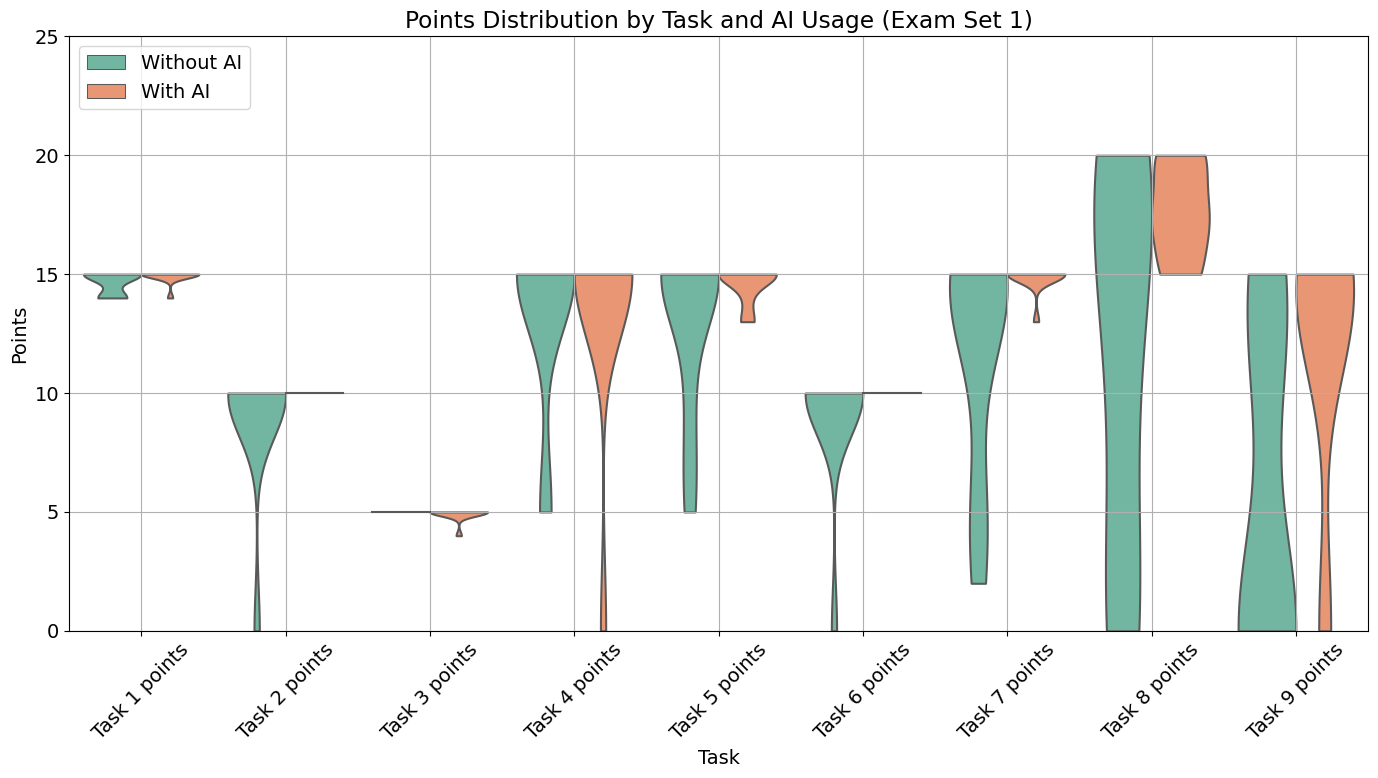

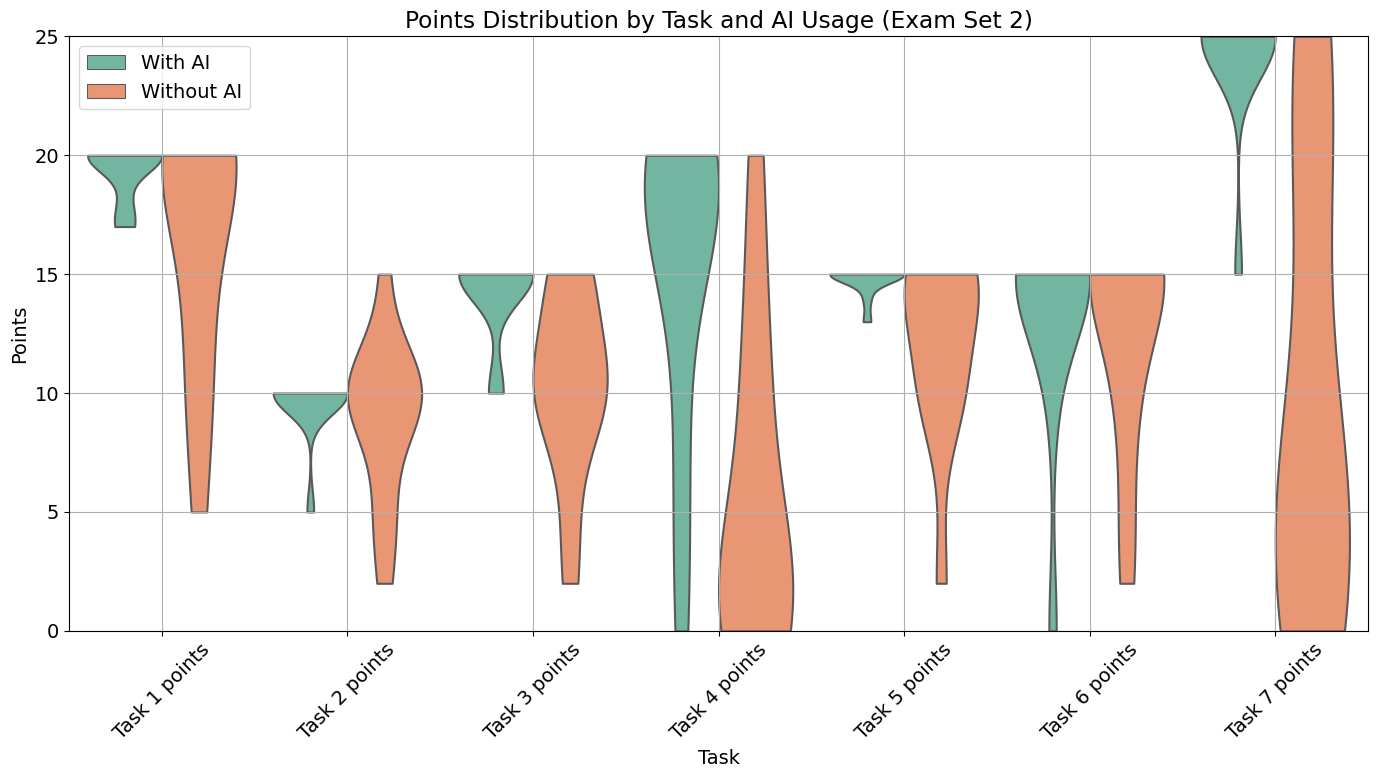

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = 'Data.csv'
data = pd.read_csv(data_path, delimiter=';')

# Define task columns
task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

# Melt the data for seaborn violin plot
data_melted_robots = pd.melt(data, id_vars=['With AI', 'Exam Set'], value_vars=task_columns_robots, var_name='Task', value_name='Points')
data_melted_adv = pd.melt(data, id_vars=['With AI', 'Exam Set'], value_vars=task_columns_adv, var_name='Task', value_name='Points')

# Filter the melted data for each exam set
data_melted_robots = data_melted_robots[data_melted_robots['Exam Set'] == 'Exam set 1']
data_melted_adv = data_melted_adv[data_melted_adv['Exam Set'] == 'Exam set 2']

# Define colors
colors = sns.color_palette("Set2")

figures = {}

def plot_violin_without_extras(task_columns, data_melted, title):
    plt.figure(figsize=(14, 8))
    
    # Create a new column to differentiate AI usage for plotting side by side
    data_melted['AI Usage'] = data_melted['With AI'].apply(lambda x: 'With AI' if x == 'Yes' else 'Without AI')
    
    sns.violinplot(x='Task', y='Points', hue='AI Usage', data=data_melted, palette=colors, cut=0, scale='width', inner=None)
    
    plt.xlabel('Task')
    plt.ylabel('Points')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(range(0, 26, 5))  # Set y-axis intervals to 5
    plt.ylim(0, 25)  # Ensure the y-axis limit includes a reasonable range
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create the violin plot without extras for Exam Set 1
plot_violin_without_extras(task_columns_robots, data_melted_robots, 'Points Distribution by Task and AI Usage (Exam Set 1)')

# Create the violin plot without extras for Exam Set 2
plot_violin_without_extras(task_columns_adv, data_melted_adv, 'Points Distribution by Task and AI Usage (Exam Set 2)')
